In [9]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Normalize the data
X = X / 255.0

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Convert labels to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [11]:
#
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Train
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)

Perceptron(random_state=42)

In [13]:
# Predict on the test set
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1380
           1       0.93      0.95      0.94      1632
           2       0.89      0.88      0.88      1433
           3       0.83      0.84      0.83      1431
           4       0.88      0.88      0.88      1328
           5       0.78      0.81      0.80      1297
           6       0.93      0.94      0.94      1331
           7       0.92      0.88      0.90      1444
           8       0.79      0.80      0.80      1351
           9       0.85      0.83      0.84      1373

    accuracy                           0.88     14000
   macro avg       0.88      0.88      0.88     14000
weighted avg       0.88      0.88      0.88     14000

Confusion Matrix:
[[1299    0    3    4    6   15   13    5   32    3]
 [   1 1557   23   10    1   12    1    3   20    4]
 [  15   12 1257   31   24   10   22   17   37    8]
 [  14    8   53 1197   17

KeyError: 12707

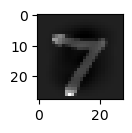

In [14]:
# Plot a few test images along with predicted and true labels
def plot_predictions(X, y_true, y_pred, num_images=5):
    indices = np.random.choice(len(X), num_images, replace=False)
    for i, index in enumerate(indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X[index].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {y_pred[index]}\nTrue: {y_true[index]}")
        plt.axis('off')
    plt.show()

plot_predictions(X_test, y_test, y_pred)
